# FOD Classification

**RBE 595 Project**\
**CNN Model**

**Student Name:\
Larson, Derek\
Morzel, Jesse\
Sherifi, Abedin**\


**Date: 04/23/2021**\
**RBE 595 - AI**

## Imports

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
import scipy
from scipy import ndimage
import imageio
import os
import glob
import h5py
import skimage
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from imageio import imread
from skimage.transform import resize
from skimage import data
#from python-utils import imread, imresize, imsave
#from scipy.misc import imageio, imsave, imresize
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.layers import Convolution2D,MaxPooling2D
from keras import backend as K
K.set_image_data_format('channels_first')
from PIL import Image
import pandas as pd
import cv2
from keras import layers
from keras.callbacks import EarlyStopping
from keras import models
from keras.layers import (Input, Dense, Activation, ZeroPadding2D,
BatchNormalization, Flatten, Conv2D, concatenate, Lambda)
from keras.layers import (AveragePooling2D, MaxPooling2D, Dropout,
GlobalMaxPooling2D, GlobalAveragePooling2D)
from keras.models import Model, load_model
from keras import regularizers, optimizers
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn import preprocessing
import matplotlib.pyplot as plt

Generating csv file based on images

In [9]:
import os, csv

f=open("data.csv",'w+')
w=csv.writer(f)
for path, dirs, files in os.walk("image_test"):
    for filename in files:
        w.writerow([filename])

## Image Preprocessing
Reading in images => sobel => normalization => resizing

In [79]:
def preprocess_img(img, name):
    sobel_dir = 'image_test/'
    im = img.astype('int32')
    dx = ndimage.sobel(im, 1)
    dy = ndimage.sobel(im, 0)
    mag = np.hypot(dx, dy)
    mag *= 255.0 / np.max(mag)
    
    #rescale to standard size
    mag = imresize(mag, (200, 299))

    print(os.path.join(sobel_dir,name))
    imageio.imsave(os.path.join(sobel_dir,name), mag)
    
    return img

root_dir = 'image_original/'

for f in os.listdir(root_dir):
    im = imageio.imread(os.path.join(root_dir,f), format='jpeg')
    img = preprocess_img(im, f)

Lossy conversion from int32 to uint8. Range [-2141, 2160]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2644, 2760]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-4036, 4021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2688, 2724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2760, 2544]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3342, 2885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1977, 1946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2053, 1897]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/metal_moderate_031_new.jpg
image_resize/paper_object_004_new.jpg
image_resize/stone_moderate_044_new.jpg
image_resize/metal_moderate_050_new.jpg
image_resize/wood_object_040_new.jpg
image_resize/water_object_005_new.jpg
image_resize/stone_object_040_new.jpg
image_resize/metal_object_007_new.jpg
image_resize/stone_moderate_021_new.jpg
image_resize/glass_moderate_001_new.jpg


Lossy conversion from int32 to uint8. Range [-2069, 2507]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3160, 3187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3565, 2301]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1732, 2191]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3552, 3441]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2400, 2536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3031, 3221]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3583, 3272]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/metal_object_037_new.jpg
image_resize/metal_object_042_new.jpg
image_resize/stone_object_042_new.jpg
image_resize/plastic_object_010_new.jpg
image_resize/metal_object_048_new.jpg
image_resize/leather_object_011_new.jpg
image_resize/glass_object_031_new.jpg
image_resize/glass_moderate_005_new.jpg
image_resize/glass_object_040_new.jpg
image_resize/plastic_moderate_025_new.jpg


Lossy conversion from int32 to uint8. Range [-2751, 2592]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2740, 2636]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2293, 2679]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2259, 2280]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3035, 2973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2420, 2646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2840, 2764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3030, 3740]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/wood_object_016_new.jpg
image_resize/foliage_final_067_new.jpg
image_resize/stone_moderate_024_new.jpg
image_resize/glass_object_004_new.jpg
image_resize/glass_moderate_048_new.jpg
image_resize/fabric_object_004_new.jpg
image_resize/water_moderate_029_new.jpg
image_resize/wood_moderate_037_new.jpg
image_resize/plastic_object_041_new.jpg
image_resize/paper_moderate_022_new.jpg


Lossy conversion from int32 to uint8. Range [-2251, 2380]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3142, 2814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2588, 3058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2071, 2724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2040, 2247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3274, 3295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3460, 3275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3122, 2413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/fabric_moderate_047_new.jpg
image_resize/foliage_final_022_new.jpg
image_resize/fabric_moderate_027_new.jpg
image_resize/foliage_final_037_new.jpg
image_resize/foliage_final_069_new.jpg
image_resize/fabric_moderate_011_new.jpg
image_resize/glass_moderate_037_new.jpg
image_resize/stone_object_012_new.jpg
image_resize/stone_moderate_025_new.jpg


Lossy conversion from int32 to uint8. Range [-2827, 2920]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2701, 2672]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1940, 1928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3049, 2973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3262, 3411]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2470, 2640]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2696, 2801]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3588, 3723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/wood_moderate_042_new.jpg
image_resize/leather_object_023_new.jpg
image_resize/water_object_001_new.jpg
image_resize/plastic_object_048_new.jpg
image_resize/paper_object_043_new.jpg
image_resize/wood_object_009_new.jpg
image_resize/water_moderate_026_new.jpg
image_resize/fabric_object_010_new.jpg
image_resize/metal_object_028_new.jpg
image_resize/fabric_object_007_new.jpg


Lossy conversion from int32 to uint8. Range [-2385, 2812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1632, 1866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2627, 2518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2486, 2611]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1740, 1156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2520, 2155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3936, 3849]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3165, 2998]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/foliage_final_095_new.jpg
image_resize/water_moderate_044_new.jpg
image_resize/fabric_moderate_021_new.jpg
image_resize/glass_object_032_new.jpg
image_resize/paper_moderate_034_new.jpg
image_resize/paper_object_021_new.jpg
image_resize/stone_moderate_046_new.jpg
image_resize/wood_moderate_007_new.jpg
image_resize/fabric_moderate_017_new.jpg
image_resize/fabric_moderate_005_new.jpg


Lossy conversion from int32 to uint8. Range [-2634, 2704]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3392, 3424]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3264, 3290]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2604, 2497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1798, 1962]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2624, 2339]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2962, 3066]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2860, 3479]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/metal_object_030_new.jpg
image_resize/glass_moderate_025_new.jpg
image_resize/leather_moderate_040_new.jpg
image_resize/foliage_final_026_new.jpg
image_resize/water_moderate_006_new.jpg
image_resize/glass_object_013_new.jpg
image_resize/leather_object_027_new.jpg
image_resize/plastic_object_014_new.jpg
image_resize/glass_object_047_new.jpg
image_resize/plastic_moderate_017_new.jpg


Lossy conversion from int32 to uint8. Range [-2581, 2500]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1746, 3008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2511, 2248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2488, 2768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2384, 2419]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3723, 3550]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3215, 2768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2284, 2726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/foliage_final_030_new.jpg
image_resize/leather_moderate_049_new.jpg
image_resize/wood_moderate_002_new.jpg
image_resize/leather_object_004_new.jpg
image_resize/foliage_final_099_new.jpg
image_resize/stone_object_003_new.jpg
image_resize/foliage_final_060_new.jpg
image_resize/glass_object_016_new.jpg
image_resize/plastic_moderate_023_new.jpg
image_resize/paper_moderate_023_new.jpg


Lossy conversion from int32 to uint8. Range [-1888, 2774]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2283, 2356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2048, 1839]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2728, 2676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2916, 2728]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3379, 3201]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3059, 3310]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3279, 2672]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/fabric_moderate_022_new.jpg
image_resize/foliage_final_021_new.jpg
image_resize/stone_moderate_007_new.jpg
image_resize/plastic_object_004_new.jpg
image_resize/water_object_016_new.jpg
image_resize/glass_moderate_023_new.jpg
image_resize/foliage_final_048_new.jpg
image_resize/water_moderate_039_new.jpg
image_resize/stone_moderate_035_new.jpg
image_resize/water_moderate_019_new.jpg


Lossy conversion from int32 to uint8. Range [-2599, 2584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2836, 2800]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2848, 2913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2738, 2480]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3246, 3099]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-4043, 3811]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3465, 3333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2730, 3225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/glass_moderate_020_new.jpg
image_resize/wood_moderate_024_new.jpg
image_resize/water_moderate_023_new.jpg
image_resize/paper_object_048_new.jpg
image_resize/glass_object_010_new.jpg
image_resize/leather_object_036_new.jpg
image_resize/stone_object_010_new.jpg
image_resize/paper_object_025_new.jpg
image_resize/water_object_033_new.jpg
image_resize/fabric_object_031_new.jpg


Lossy conversion from int32 to uint8. Range [-1884, 2223]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3401, 3216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2584, 2616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2664, 3470]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2681, 2937]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2338, 2191]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2881, 3140]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2492, 2446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/stone_object_031_new.jpg
image_resize/glass_object_017_new.jpg
image_resize/metal_object_001_new.jpg
image_resize/leather_moderate_042_new.jpg
image_resize/paper_object_039_new.jpg
image_resize/fabric_moderate_007_new.jpg
image_resize/metal_object_029_new.jpg
image_resize/metal_object_014_new.jpg
image_resize/wood_moderate_050_new.jpg
image_resize/wood_moderate_026_new.jpg


Lossy conversion from int32 to uint8. Range [-2803, 2574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3056, 3186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-4041, 3933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2500, 2451]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2380, 1831]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2321, 2437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2730, 2810]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3295, 3072]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/leather_moderate_034_new.jpg
image_resize/stone_object_026_new.jpg
image_resize/stone_moderate_012_new.jpg
image_resize/metal_object_047_new.jpg
image_resize/paper_object_008_new.jpg
image_resize/paper_object_046_new.jpg
image_resize/metal_object_021_new.jpg
image_resize/fabric_moderate_026_new.jpg
image_resize/paper_object_019_new.jpg
image_resize/leather_object_030_new.jpg


Lossy conversion from int32 to uint8. Range [-1312, 1344]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1896, 1772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2933, 3181]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2388, 2521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3337, 3348]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2956, 3046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3000, 2868]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2631, 3070]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/wood_object_023_new.jpg
image_resize/glass_moderate_019_new.jpg
image_resize/paper_moderate_013_new.jpg
image_resize/wood_object_002_new.jpg
image_resize/water_object_024_new.jpg
image_resize/foliage_final_001_new.jpg
image_resize/water_moderate_048_new.jpg
image_resize/leather_moderate_011_new.jpg
image_resize/glass_moderate_012_new.jpg
image_resize/plastic_moderate_028_new.jpg


Lossy conversion from int32 to uint8. Range [-3860, 3588]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3902, 3968]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2179, 2828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2920, 2756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2109, 2150]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1944, 2196]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2559, 2558]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2666, 2714]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/stone_object_004_new.jpg
image_resize/water_object_045_new.jpg
image_resize/fabric_moderate_003_new.jpg
image_resize/paper_object_037_new.jpg
image_resize/plastic_moderate_018_new.jpg
image_resize/glass_moderate_044_new.jpg
image_resize/metal_moderate_004_new.jpg
image_resize/metal_moderate_022_new.jpg
image_resize/fabric_object_047_new.jpg
image_resize/plastic_moderate_032_new.jpg
image_resize/paper_object_023_new.jpg


Lossy conversion from int32 to uint8. Range [-2614, 2496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2493, 2132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2773, 2637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2340, 2516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3347, 1253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2330, 2295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3624, 3582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3104, 2999]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/plastic_moderate_035_new.jpg
image_resize/foliage_final_064_new.jpg
image_resize/glass_object_041_new.jpg
image_resize/fabric_moderate_012_new.jpg
image_resize/metal_moderate_006_new.jpg
image_resize/fabric_object_003_new.jpg
image_resize/fabric_moderate_033_new.jpg
image_resize/paper_object_031_new.jpg
image_resize/fabric_object_040_new.jpg
image_resize/leather_object_046_new.jpg


Lossy conversion from int32 to uint8. Range [-2430, 2423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2253, 2437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2635, 2628]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2969, 3258]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-4008, 3664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2497, 2362]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2560, 2646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2919, 3087]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/foliage_final_036_new.jpg
image_resize/leather_object_022_new.jpg
image_resize/paper_moderate_016_new.jpg
image_resize/wood_moderate_036_new.jpg
image_resize/wood_moderate_011_new.jpg
image_resize/water_moderate_037_new.jpg
image_resize/leather_moderate_021_new.jpg
image_resize/water_object_039_new.jpg
image_resize/wood_object_001_new.jpg
image_resize/glass_moderate_010_new.jpg


Lossy conversion from int32 to uint8. Range [-4014, 4043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2886, 2792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2460, 2691]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1697, 893]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2658, 2922]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-622, 1449]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2537, 2623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2955, 3629]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conv

image_resize/metal_object_005_new.jpg
image_resize/fabric_object_023_new.jpg
image_resize/plastic_object_029_new.jpg
image_resize/foliage_final_045_new.jpg
image_resize/plastic_moderate_026_new.jpg
image_resize/foliage_final_097_new.jpg
image_resize/glass_object_039_new.jpg
image_resize/leather_moderate_029_new.jpg
image_resize/glass_object_027_new.jpg
image_resize/leather_moderate_027_new.jpg


Lossy conversion from int32 to uint8. Range [-1821, 1563]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2342, 3056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3932, 3843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2652, 2716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2166, 2152]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2096, 2383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3048, 3685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3930, 3744]. Convert image to uint8 prior to saving to suppress this warning.


image_resize/leather_object_040_new.jpg
image_resize/plastic_moderate_038_new.jpg
image_resize/paper_object_024_new.jpg
image_resize/fabric_object_036_new.jpg
image_resize/stone_object_020_new.jpg
image_resize/metal_moderate_023_new.jpg
image_resize/paper_moderate_014_new.jpg
image_resize/metal_moderate_034_new.jpg


Lossy conversion from int32 to uint8. Range [-2387, 2488]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3114, 2642]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2331, 2373]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1985, 2946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2255, 2273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2744, 3271]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2569, 2764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3555, 3783]. Convert image to uint8 prior to saving to suppress this warning.


image_resize/fabric_moderate_015_new.jpg
image_resize/fabric_object_048_new.jpg
image_resize/plastic_moderate_022_new.jpg
image_resize/plastic_moderate_040_new.jpg
image_resize/paper_moderate_038_new.jpg
image_resize/glass_object_011_new.jpg
image_resize/metal_moderate_026_new.jpg
image_resize/leather_moderate_047_new.jpg


Lossy conversion from int32 to uint8. Range [-2599, 3381]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2025, 2113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2361, 2440]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3817, 3724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3338, 3359]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2808, 2708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2664, 2562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2569, 2922]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/plastic_moderate_008_new.jpg
image_resize/plastic_object_008_new.jpg
image_resize/plastic_object_011_new.jpg
image_resize/metal_object_049_new.jpg
image_resize/paper_object_034_new.jpg
image_resize/metal_object_012_new.jpg
image_resize/wood_object_014_new.jpg
image_resize/glass_object_034_new.jpg
image_resize/water_moderate_030_new.jpg
image_resize/leather_object_006_new.jpg


Lossy conversion from int32 to uint8. Range [-2798, 2630]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2434, 3280]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2606, 2617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2319, 2556]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3257, 3039]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2531, 2578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2963, 2651]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2480, 3178]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/fabric_object_019_new.jpg
image_resize/plastic_moderate_012_new.jpg
image_resize/metal_object_033_new.jpg
image_resize/leather_object_049_new.jpg
image_resize/foliage_final_084_new.jpg
image_resize/plastic_moderate_004_new.jpg
image_resize/glass_moderate_024_new.jpg
image_resize/fabric_object_026_new.jpg
image_resize/stone_moderate_005_new.jpg
image_resize/foliage_final_043_new.jpg


Lossy conversion from int32 to uint8. Range [-2902, 2802]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-739, 674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2669, 2808]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3172, 1994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3973, 3739]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3816, 3488]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3050, 3953]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-4068, 3747]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conv

image_resize/glass_object_007_new.jpg
image_resize/paper_moderate_003_new.jpg
image_resize/metal_object_025_new.jpg
image_resize/leather_object_026_new.jpg
image_resize/water_object_027_new.jpg
image_resize/wood_moderate_047_new.jpg
image_resize/stone_moderate_050_new.jpg
image_resize/paper_moderate_002_new.jpg
image_resize/stone_moderate_028_new.jpg
image_resize/wood_moderate_008_new.jpg


Lossy conversion from int32 to uint8. Range [-2089, 1856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3029, 3367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2675, 2993]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2214, 2273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3368, 3748]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2650, 2612]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2622, 2641]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3827, 3654]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/leather_moderate_044_new.jpg
image_resize/fabric_moderate_016_new.jpg
image_resize/plastic_moderate_036_new.jpg
image_resize/metal_moderate_008_new.jpg
image_resize/wood_object_011_new.jpg
image_resize/foliage_final_046_new.jpg
image_resize/water_moderate_010_new.jpg
image_resize/water_moderate_014_new.jpg
image_resize/water_moderate_032_new.jpg
image_resize/leather_moderate_012_new.jpg


Lossy conversion from int32 to uint8. Range [-3134, 3293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2251, 3349]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2585, 2759]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3642, 3537]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2790, 2436]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3674, 3979]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2748, 2858]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1683, 1710]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/foliage_final_051_new.jpg
image_resize/water_object_040_new.jpg
image_resize/fabric_object_039_new.jpg
image_resize/water_moderate_002_new.jpg
image_resize/glass_object_024_new.jpg
image_resize/wood_moderate_006_new.jpg
image_resize/foliage_final_055_new.jpg
image_resize/plastic_moderate_011_new.jpg
image_resize/leather_moderate_003_new.jpg
image_resize/leather_object_019_new.jpg


Lossy conversion from int32 to uint8. Range [-2619, 2606]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3952, 3697]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3657, 2907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2868, 2874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2999, 3082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3432, 2812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2910, 2904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3818, 3369]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/metal_moderate_049_new.jpg
image_resize/plastic_moderate_037_new.jpg
image_resize/wood_moderate_048_new.jpg
image_resize/plastic_moderate_003_new.jpg
image_resize/paper_moderate_047_new.jpg
image_resize/stone_object_035_new.jpg
image_resize/wood_moderate_038_new.jpg
image_resize/wood_object_034_new.jpg
image_resize/wood_moderate_028_new.jpg
image_resize/glass_moderate_042_new.jpg


Lossy conversion from int32 to uint8. Range [-2499, 2428]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1873, 1968]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2344, 1852]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1765, 1712]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3156, 3027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3600, 3681]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2252, 2104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2798, 2552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/metal_moderate_018_new.jpg
image_resize/water_moderate_042_new.jpg
image_resize/leather_object_009_new.jpg
image_resize/metal_object_004_new.jpg
image_resize/stone_object_038_new.jpg
image_resize/glass_moderate_009_new.jpg
image_resize/water_object_032_new.jpg
image_resize/water_object_015_new.jpg
image_resize/plastic_object_044_new.jpg
image_resize/foliage_final_018_new.jpg


Lossy conversion from int32 to uint8. Range [-2748, 1842]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2717, 2786]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1412, 1588]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2064, 2808]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1384, 1520]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1685, 2090]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1886, 1280]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2095, 1936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/stone_object_045_new.jpg
image_resize/plastic_moderate_007_new.jpg
image_resize/glass_object_002_new.jpg
image_resize/paper_moderate_024_new.jpg
image_resize/stone_object_037_new.jpg
image_resize/paper_moderate_037_new.jpg
image_resize/plastic_moderate_019_new.jpg
image_resize/glass_moderate_026_new.jpg
image_resize/wood_moderate_009_new.jpg


Lossy conversion from int32 to uint8. Range [-2751, 2794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3632, 3364]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-4026, 4004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3378, 2282]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2941, 3301]. Convert image to uint8 prior to saving to suppress this warning.


image_resize/water_moderate_050_new.jpg
image_resize/wood_moderate_016_new.jpg
image_resize/paper_moderate_049_new.jpg
image_resize/plastic_object_047_new.jpg
image_resize/metal_object_035_new.jpg
image_resize/glass_moderate_013_new.jpg


Lossy conversion from int32 to uint8. Range [-3856, 3524]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2957, 2338]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2378, 2324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2377, 2147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2758, 2762]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2756, 2741]. Convert image to uint8 prior to saving to suppress this warning.


image_resize/metal_object_034_new.jpg
image_resize/plastic_object_037_new.jpg
image_resize/leather_object_002_new.jpg
image_resize/leather_moderate_025_new.jpg
image_resize/glass_moderate_016_new.jpg


Lossy conversion from int32 to uint8. Range [-2008, 1933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3812, 3216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2489, 2005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2353, 2338]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2707, 2104]. Convert image to uint8 prior to saving to suppress this warning.


image_resize/foliage_final_100_new.jpg
image_resize/wood_object_029_new.jpg
image_resize/plastic_object_032_new.jpg
image_resize/paper_object_009_new.jpg
image_resize/metal_moderate_007_new.jpg


Lossy conversion from int32 to uint8. Range [-2510, 2389]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3292, 3046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3060, 2997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3241, 2973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2866, 2643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2832, 3107]. Convert image to uint8 prior to saving to suppress this warning.


image_resize/plastic_moderate_044_new.jpg
image_resize/water_moderate_043_new.jpg
image_resize/plastic_moderate_050_new.jpg
image_resize/glass_object_001_new.jpg
image_resize/paper_moderate_032_new.jpg
image_resize/metal_object_026_new.jpg


Lossy conversion from int32 to uint8. Range [-2403, 2413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3026, 2843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3778, 2821]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1500, 1400]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3693, 3706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1217, 1515]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2575, 2340]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2066, 2204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/fabric_object_006_new.jpg
image_resize/wood_moderate_030_new.jpg
image_resize/leather_object_016_new.jpg
image_resize/fabric_moderate_020_new.jpg
image_resize/leather_moderate_041_new.jpg
image_resize/wood_object_039_new.jpg
image_resize/paper_moderate_005_new.jpg
image_resize/plastic_object_030_new.jpg
image_resize/water_moderate_021_new.jpg


Lossy conversion from int32 to uint8. Range [-1792, 2039]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2849, 2796]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2687, 1927]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2884, 2802]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3214, 3402]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3418, 2333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3039, 3251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2708, 3119]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/plastic_object_043_new.jpg
image_resize/stone_object_044_new.jpg
image_resize/wood_moderate_044_new.jpg
image_resize/metal_moderate_001_new.jpg
image_resize/water_moderate_041_new.jpg
image_resize/foliage_final_054_new.jpg
image_resize/stone_object_002_new.jpg
image_resize/wood_moderate_017_new.jpg
image_resize/foliage_final_059_new.jpg


Lossy conversion from int32 to uint8. Range [-2731, 2322]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1825, 2900]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3898, 3804]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2260, 2117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2762, 2380]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2404, 2496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3089, 2635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2160, 2272]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/fabric_object_017_new.jpg
image_resize/stone_object_001_new.jpg
image_resize/wood_moderate_046_new.jpg
image_resize/leather_moderate_020_new.jpg
image_resize/water_moderate_009_new.jpg
image_resize/paper_object_047_new.jpg
image_resize/stone_moderate_041_new.jpg
image_resize/stone_moderate_033_new.jpg
image_resize/leather_moderate_024_new.jpg


Lossy conversion from int32 to uint8. Range [-2830, 2608]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2978, 2883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2725, 2139]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2506, 2417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2404, 2977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2906, 3140]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2384, 2864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3974, 3729]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/metal_object_020_new.jpg
image_resize/foliage_final_070_new.jpg
image_resize/paper_moderate_041_new.jpg
image_resize/fabric_object_041_new.jpg
image_resize/foliage_final_061_new.jpg
image_resize/foliage_final_086_new.jpg
image_resize/metal_moderate_011_new.jpg
image_resize/metal_moderate_033_new.jpg
image_resize/leather_object_014_new.jpg


Lossy conversion from int32 to uint8. Range [-2975, 3128]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2440, 2845]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2124, 2069]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3167, 3983]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2635, 2203]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1802, 1761]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2696, 3684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3345, 3276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/plastic_moderate_033_new.jpg
image_resize/foliage_final_052_new.jpg
image_resize/glass_object_049_new.jpg
image_resize/glass_object_042_new.jpg
image_resize/fabric_object_046_new.jpg
image_resize/wood_object_008_new.jpg
image_resize/leather_object_007_new.jpg
image_resize/foliage_final_079_new.jpg
image_resize/water_object_038_new.jpg
image_resize/plastic_object_045_new.jpg


Lossy conversion from int32 to uint8. Range [-2942, 2888]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2868, 2940]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2712, 2721]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2967, 2805]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2820, 2843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3565, 3267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1783, 1690]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2399, 2361]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/fabric_object_045_new.jpg
image_resize/fabric_object_014_new.jpg
image_resize/glass_moderate_017_new.jpg
image_resize/water_moderate_031_new.jpg
image_resize/stone_moderate_026_new.jpg
image_resize/water_object_028_new.jpg
image_resize/paper_object_010_new.jpg
image_resize/water_object_034_new.jpg
image_resize/foliage_final_004_new.jpg


Lossy conversion from int32 to uint8. Range [-2263, 2226]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2788, 2697]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2740, 2761]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2364, 2012]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2344, 2704]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2899, 2967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3066, 2688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2729, 2976]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/glass_object_012_new.jpg
image_resize/paper_object_032_new.jpg
image_resize/plastic_object_049_new.jpg
image_resize/stone_moderate_047_new.jpg
image_resize/glass_moderate_015_new.jpg
image_resize/leather_moderate_005_new.jpg
image_resize/fabric_object_034_new.jpg
image_resize/glass_moderate_041_new.jpg
image_resize/wood_object_033_new.jpg
image_resize/plastic_object_012_new.jpg


Lossy conversion from int32 to uint8. Range [-3042, 2976]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2486, 2831]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-4009, 3672]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2888, 2091]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2418, 2721]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2463, 2972]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3588, 3651]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2979, 2887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/stone_moderate_017_new.jpg
image_resize/leather_object_017_new.jpg
image_resize/water_moderate_035_new.jpg
image_resize/stone_moderate_043_new.jpg
image_resize/leather_moderate_015_new.jpg
image_resize/fabric_object_033_new.jpg
image_resize/metal_moderate_025_new.jpg
image_resize/fabric_moderate_010_new.jpg
image_resize/foliage_final_031_new.jpg
image_resize/paper_object_020_new.jpg


Lossy conversion from int32 to uint8. Range [-2806, 3021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3040, 3184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2525, 2381]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2342, 2586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3151, 3197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2323, 2392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2660, 2506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2008, 2038]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/fabric_object_005_new.jpg
image_resize/stone_object_028_new.jpg
image_resize/foliage_final_006_new.jpg
image_resize/metal_moderate_048_new.jpg
image_resize/plastic_object_023_new.jpg
image_resize/stone_object_005_new.jpg
image_resize/foliage_final_072_new.jpg
image_resize/metal_object_045_new.jpg
image_resize/stone_moderate_036_new.jpg
image_resize/stone_moderate_003_new.jpg


Lossy conversion from int32 to uint8. Range [-2016, 3130]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2770, 2915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3826, 3994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2737, 3016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2448, 2020]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2067, 1920]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3592, 2731]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2938, 2999]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/metal_moderate_041_new.jpg
image_resize/metal_moderate_038_new.jpg
image_resize/wood_moderate_039_new.jpg
image_resize/fabric_moderate_018_new.jpg
image_resize/wood_object_020_new.jpg
image_resize/stone_moderate_014_new.jpg
image_resize/paper_object_045_new.jpg
image_resize/metal_object_036_new.jpg
image_resize/stone_moderate_039_new.jpg
image_resize/glass_object_044_new.jpg


Lossy conversion from int32 to uint8. Range [-3524, 3682]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3459, 3496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2417, 2148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2451, 3423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2816, 2436]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2824, 3212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2056, 1716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3614, 3497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/leather_object_029_new.jpg
image_resize/wood_moderate_027_new.jpg
image_resize/fabric_moderate_035_new.jpg
image_resize/plastic_moderate_013_new.jpg
image_resize/plastic_object_005_new.jpg
image_resize/glass_object_006_new.jpg
image_resize/metal_moderate_020_new.jpg
image_resize/wood_object_017_new.jpg
image_resize/wood_object_010_new.jpg
image_resize/foliage_final_008_new.jpg


Lossy conversion from int32 to uint8. Range [-2910, 2333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2600, 2161]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2814, 2781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2896, 2703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2354, 2190]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2531, 2310]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2061, 2124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2855, 2907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/glass_object_019_new.jpg
image_resize/paper_object_018_new.jpg
image_resize/foliage_final_062_new.jpg
image_resize/glass_object_015_new.jpg
image_resize/water_moderate_017_new.jpg
image_resize/glass_moderate_003_new.jpg
image_resize/glass_object_003_new.jpg
image_resize/paper_object_005_new.jpg
image_resize/paper_moderate_045_new.jpg
image_resize/wood_moderate_010_new.jpg


Lossy conversion from int32 to uint8. Range [-2293, 2143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3570, 3571]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2485, 2702]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-684, 1293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2820, 2828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3104, 3080]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2559, 2726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3196, 3812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy con

image_resize/leather_object_010_new.jpg
image_resize/glass_moderate_034_new.jpg
image_resize/plastic_moderate_030_new.jpg
image_resize/plastic_object_007_new.jpg
image_resize/glass_moderate_022_new.jpg
image_resize/water_moderate_033_new.jpg
image_resize/foliage_final_094_new.jpg
image_resize/metal_moderate_005_new.jpg
image_resize/stone_object_015_new.jpg
image_resize/water_moderate_047_new.jpg


Lossy conversion from int32 to uint8. Range [-2433, 2429]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2987, 3058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2970, 3176]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2148, 2514]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1532, 2238]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2221, 2247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2241, 2228]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3133, 2973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/plastic_object_006_new.jpg
image_resize/wood_object_043_new.jpg
image_resize/leather_object_028_new.jpg
image_resize/plastic_moderate_024_new.jpg
image_resize/foliage_final_047_new.jpg
image_resize/leather_moderate_035_new.jpg
image_resize/water_moderate_025_new.jpg
image_resize/glass_object_048_new.jpg
image_resize/foliage_final_089_new.jpg
image_resize/paper_moderate_033_new.jpg


Lossy conversion from int32 to uint8. Range [-2024, 2200]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2757, 2616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2996, 2762]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3481, 3055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2037, 2396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2588, 2623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2203, 2200]. Convert image to uint8 prior to saving to suppress this warning.


image_resize/stone_object_006_new.jpg
image_resize/leather_moderate_028_new.jpg
image_resize/glass_moderate_006_new.jpg
image_resize/glass_object_036_new.jpg
image_resize/paper_moderate_042_new.jpg
image_resize/foliage_final_023_new.jpg
image_resize/stone_moderate_037_new.jpg


Lossy conversion from int32 to uint8. Range [-3430, 3008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2995, 3396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2779, 2988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2634, 2801]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2387, 2471]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2240, 2486]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2195, 1946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2264, 2701]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/stone_moderate_030_new.jpg
image_resize/fabric_moderate_030_new.jpg
image_resize/paper_object_038_new.jpg
image_resize/foliage_final_041_new.jpg
image_resize/glass_moderate_046_new.jpg
image_resize/metal_moderate_043_new.jpg
image_resize/glass_moderate_002_new.jpg
image_resize/paper_object_014_new.jpg
image_resize/glass_moderate_032_new.jpg
image_resize/metal_object_016_new.jpg


Lossy conversion from int32 to uint8. Range [-2334, 2551]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2011, 2054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2280, 2466]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2344, 1676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3177, 3518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2191, 2549]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2604, 2222]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2064, 2657]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/leather_moderate_032_new.jpg
image_resize/plastic_object_038_new.jpg
image_resize/plastic_object_018_new.jpg
image_resize/leather_object_037_new.jpg
image_resize/paper_object_007_new.jpg
image_resize/fabric_object_020_new.jpg
image_resize/foliage_final_078_new.jpg
image_resize/water_moderate_008_new.jpg
image_resize/water_object_025_new.jpg
image_resize/stone_object_009_new.jpg


Lossy conversion from int32 to uint8. Range [-2401, 2572]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2841, 2974]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3398, 3634]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2345, 2874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2940, 2495]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2709, 1976]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3452, 2867]. Convert image to uint8 prior to saving to suppress this warning.


image_resize/wood_moderate_013_new.jpg
image_resize/glass_moderate_050_new.jpg
image_resize/wood_object_046_new.jpg
image_resize/stone_moderate_015_new.jpg
image_resize/glass_moderate_040_new.jpg
image_resize/plastic_object_031_new.jpg
image_resize/stone_object_013_new.jpg


Lossy conversion from int32 to uint8. Range [-3240, 3240]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2444, 1590]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3992, 4016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2933, 3145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3808, 3783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3489, 2814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2503, 2714]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2515, 2326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/foliage_final_096_new.jpg
image_resize/foliage_final_034_new.jpg
image_resize/wood_object_036_new.jpg
image_resize/fabric_moderate_025_new.jpg
image_resize/wood_object_024_new.jpg
image_resize/water_moderate_046_new.jpg
image_resize/glass_object_023_new.jpg
image_resize/glass_moderate_018_new.jpg
image_resize/fabric_object_050_new.jpg


Lossy conversion from int32 to uint8. Range [-2550, 2773]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1724, 1896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3123, 3626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2508, 2534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1387, 1202]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1036, 1204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2962, 2683]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1516, 1433]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/wood_object_026_new.jpg
image_resize/wood_object_030_new.jpg
image_resize/wood_moderate_034_new.jpg
image_resize/glass_object_021_new.jpg
image_resize/plastic_object_003_new.jpg
image_resize/leather_moderate_043_new.jpg
image_resize/water_object_030_new.jpg
image_resize/leather_moderate_002_new.jpg
image_resize/leather_object_020_new.jpg
image_resize/foliage_final_090_new.jpg


Lossy conversion from int32 to uint8. Range [-3702, 3691]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3758, 3769]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1488, 1424]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2495, 2867]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2637, 3066]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2562, 2468]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3093, 2737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3334, 3279]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/plastic_object_033_new.jpg
image_resize/wood_object_015_new.jpg
image_resize/plastic_object_050_new.jpg
image_resize/foliage_final_012_new.jpg
image_resize/fabric_moderate_036_new.jpg
image_resize/wood_object_003_new.jpg
image_resize/leather_object_034_new.jpg
image_resize/water_moderate_022_new.jpg
image_resize/stone_object_008_new.jpg
image_resize/fabric_object_030_new.jpg


Lossy conversion from int32 to uint8. Range [-3059, 3011]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2661, 2834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1728, 2260]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2251, 2236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2774, 2931]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3087, 2744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2482, 2065]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2936, 2366]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/water_object_050_new.jpg
image_resize/water_moderate_012_new.jpg
image_resize/leather_moderate_001_new.jpg
image_resize/metal_object_019_new.jpg
image_resize/wood_object_031_new.jpg
image_resize/metal_object_040_new.jpg
image_resize/foliage_final_007_new.jpg
image_resize/stone_object_024_new.jpg
image_resize/stone_moderate_013_new.jpg
image_resize/foliage_final_068_new.jpg


Lossy conversion from int32 to uint8. Range [-2328, 2038]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2510, 2461]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-575, 613]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2944, 1988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2019, 2172]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3077, 3708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2577, 3049]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2892, 2791]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conv

image_resize/water_moderate_027_new.jpg
image_resize/paper_moderate_031_new.jpg
image_resize/water_moderate_007_new.jpg
image_resize/fabric_object_025_new.jpg
image_resize/paper_object_028_new.jpg
image_resize/stone_object_033_new.jpg
image_resize/glass_moderate_030_new.jpg
image_resize/plastic_moderate_002_new.jpg
image_resize/foliage_final_042_new.jpg
image_resize/paper_moderate_006_new.jpg


Lossy conversion from int32 to uint8. Range [-1933, 3198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2868, 2696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2622, 3539]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1962, 2026]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2481, 2651]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2033, 2350]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-4024, 2716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2972, 2790]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/paper_moderate_039_new.jpg
image_resize/leather_moderate_009_new.jpg
image_resize/plastic_moderate_005_new.jpg
image_resize/stone_object_016_new.jpg
image_resize/glass_object_028_new.jpg
image_resize/plastic_moderate_027_new.jpg
image_resize/metal_object_011_new.jpg
image_resize/paper_object_044_new.jpg
image_resize/glass_moderate_029_new.jpg
image_resize/wood_moderate_032_new.jpg
image_resize/leather_object_038_new.jpg


Lossy conversion from int32 to uint8. Range [-2429, 1804]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2320, 2063]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1384, 2014]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2342, 1545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2645, 1907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1351, 2015]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1620, 1628]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3135, 3330]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/stone_object_019_new.jpg
image_resize/paper_moderate_021_new.jpg
image_resize/paper_object_001_new.jpg
image_resize/leather_object_024_new.jpg
image_resize/stone_moderate_022_new.jpg
image_resize/stone_moderate_027_new.jpg
image_resize/fabric_moderate_009_new.jpg
image_resize/water_moderate_036_new.jpg
image_resize/fabric_moderate_049_new.jpg
image_resize/water_object_019_new.jpg


Lossy conversion from int32 to uint8. Range [-2150, 2460]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2340, 2813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3119, 2988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2608, 2766]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3665, 3833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2020, 2425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3039, 3501]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2704, 2820]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/fabric_moderate_031_new.jpg
image_resize/glass_object_043_new.jpg
image_resize/paper_object_050_new.jpg
image_resize/paper_object_042_new.jpg
image_resize/stone_object_018_new.jpg
image_resize/water_object_021_new.jpg
image_resize/glass_moderate_036_new.jpg
image_resize/water_moderate_015_new.jpg
image_resize/paper_moderate_007_new.jpg
image_resize/paper_object_003_new.jpg


Lossy conversion from int32 to uint8. Range [-3132, 2106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2556, 2630]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3528, 3682]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1949, 1968]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2484, 2915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2463, 2669]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2387, 2684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3458, 3379]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/leather_moderate_039_new.jpg
image_resize/glass_moderate_039_new.jpg
image_resize/plastic_moderate_014_new.jpg
image_resize/fabric_moderate_046_new.jpg
image_resize/leather_object_047_new.jpg
image_resize/water_moderate_013_new.jpg
image_resize/foliage_final_071_new.jpg
image_resize/wood_moderate_005_new.jpg
image_resize/wood_object_022_new.jpg
image_resize/metal_moderate_039_new.jpg


Lossy conversion from int32 to uint8. Range [-2121, 2415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2388, 2768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3483, 3791]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2477, 2756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2251, 2701]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2467, 2467]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3589, 3739]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1626, 2017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/leather_moderate_045_new.jpg
image_resize/stone_object_050_new.jpg
image_resize/stone_moderate_001_new.jpg
image_resize/fabric_moderate_008_new.jpg
image_resize/stone_object_023_new.jpg
image_resize/foliage_final_029_new.jpg
image_resize/paper_moderate_048_new.jpg
image_resize/foliage_final_040_new.jpg
image_resize/plastic_object_017_new.jpg
image_resize/foliage_final_011_new.jpg


Lossy conversion from int32 to uint8. Range [-3516, 3212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2474, 2368]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3271, 3586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3377, 2919]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2740, 2558]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2635, 2528]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2552, 2792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3367, 3479]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/leather_object_003_new.jpg
image_resize/fabric_object_016_new.jpg
image_resize/plastic_object_009_new.jpg
image_resize/paper_object_012_new.jpg
image_resize/stone_object_022_new.jpg
image_resize/water_object_031_new.jpg
image_resize/leather_object_032_new.jpg
image_resize/water_moderate_034_new.jpg
image_resize/plastic_moderate_009_new.jpg
image_resize/paper_object_017_new.jpg


Lossy conversion from int32 to uint8. Range [-3486, 3109]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1885, 2099]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1869, 1876]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1886, 2063]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3155, 2860]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3276, 3200]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2894, 3163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2845, 2852]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/metal_moderate_028_new.jpg
image_resize/plastic_moderate_016_new.jpg
image_resize/water_object_003_new.jpg
image_resize/glass_object_050_new.jpg
image_resize/stone_moderate_004_new.jpg
image_resize/water_object_041_new.jpg
image_resize/plastic_object_020_new.jpg
image_resize/metal_moderate_027_new.jpg
image_resize/stone_moderate_029_new.jpg
image_resize/metal_object_041_new.jpg


Lossy conversion from int32 to uint8. Range [-3127, 2363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2610, 2306]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2256, 2476]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2366, 2545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2807, 2036]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2354, 2643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1923, 1745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2055, 3230]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/foliage_final_044_new.jpg
image_resize/foliage_final_075_new.jpg
image_resize/foliage_final_014_new.jpg
image_resize/foliage_final_058_new.jpg
image_resize/paper_object_049_new.jpg
image_resize/paper_moderate_010_new.jpg
image_resize/foliage_final_009_new.jpg
image_resize/paper_object_035_new.jpg
image_resize/paper_moderate_050_new.jpg
image_resize/wood_moderate_029_new.jpg


Lossy conversion from int32 to uint8. Range [-3678, 3953]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2512, 2490]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2747, 2838]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3784, 2973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-4004, 3963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3965, 3655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2989, 2948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2232, 2439]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/fabric_object_049_new.jpg
image_resize/paper_object_036_new.jpg
image_resize/metal_moderate_036_new.jpg
image_resize/leather_object_042_new.jpg
image_resize/water_moderate_049_new.jpg
image_resize/water_object_044_new.jpg
image_resize/foliage_final_083_new.jpg
image_resize/leather_moderate_013_new.jpg
image_resize/fabric_moderate_004_new.jpg
image_resize/metal_object_038_new.jpg


Lossy conversion from int32 to uint8. Range [-2527, 2508]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2807, 2768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2216, 3303]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2955, 2960]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2461, 2585]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2588, 2774]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2937, 2520]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2865, 2893]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/stone_object_021_new.jpg
image_resize/wood_object_012_new.jpg
image_resize/stone_object_046_new.jpg
image_resize/wood_moderate_041_new.jpg
image_resize/wood_moderate_004_new.jpg
image_resize/metal_object_006_new.jpg
image_resize/foliage_final_019_new.jpg
image_resize/paper_moderate_012_new.jpg
image_resize/fabric_moderate_014_new.jpg
image_resize/water_moderate_016_new.jpg


Lossy conversion from int32 to uint8. Range [-2186, 2418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3709, 3300]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2225, 2248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3009, 3049]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2875, 2794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3748, 3954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3570, 3308]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2559, 2636]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/fabric_moderate_002_new.jpg
image_resize/paper_moderate_044_new.jpg
image_resize/glass_object_005_new.jpg
image_resize/water_object_049_new.jpg
image_resize/water_object_011_new.jpg
image_resize/wood_object_047_new.jpg
image_resize/water_moderate_045_new.jpg
image_resize/plastic_object_025_new.jpg
image_resize/paper_moderate_035_new.jpg
image_resize/paper_object_015_new.jpg


Lossy conversion from int32 to uint8. Range [-1789, 3225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3062, 2843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2580, 2523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2142, 1744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2647, 2772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2328, 2294]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2706, 2681]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2376, 2937]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/wood_object_035_new.jpg
image_resize/glass_moderate_045_new.jpg
image_resize/glass_moderate_011_new.jpg
image_resize/leather_moderate_004_new.jpg
image_resize/glass_moderate_047_new.jpg
image_resize/plastic_moderate_045_new.jpg
image_resize/fabric_moderate_044_new.jpg
image_resize/metal_moderate_013_new.jpg
image_resize/water_moderate_028_new.jpg
image_resize/metal_moderate_009_new.jpg


Lossy conversion from int32 to uint8. Range [-2734, 2414]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2610, 1851]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2991, 2633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2129, 3317]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-879, 1165]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2582, 2885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2807, 2690]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1913, 2046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy con

image_resize/foliage_final_039_new.jpg
image_resize/metal_moderate_029_new.jpg
image_resize/water_object_023_new.jpg
image_resize/stone_moderate_048_new.jpg
image_resize/metal_moderate_044_new.jpg
image_resize/metal_moderate_037_new.jpg
image_resize/paper_moderate_004_new.jpg
image_resize/leather_moderate_007_new.jpg
image_resize/fabric_object_043_new.jpg
image_resize/stone_object_049_new.jpg


Lossy conversion from int32 to uint8. Range [-2167, 2154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3038, 3231]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2917, 2466]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3036, 2941]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3016, 2848]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2365, 3128]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2863, 3112]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2939, 2844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/paper_object_040_new.jpg
image_resize/water_moderate_001_new.jpg
image_resize/fabric_moderate_037_new.jpg
image_resize/leather_object_008_new.jpg
image_resize/glass_moderate_008_new.jpg
image_resize/foliage_final_063_new.jpg
image_resize/leather_object_045_new.jpg
image_resize/paper_object_041_new.jpg
image_resize/glass_object_026_new.jpg
image_resize/foliage_final_077_new.jpg


Lossy conversion from int32 to uint8. Range [-2326, 2617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2470, 2675]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3096, 2903]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1685, 3124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3382, 2880]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3391, 3099]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2991, 2914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1212, 2576]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/leather_moderate_023_new.jpg
image_resize/water_object_002_new.jpg
image_resize/wood_object_032_new.jpg
image_resize/paper_object_013_new.jpg
image_resize/foliage_final_013_new.jpg
image_resize/stone_moderate_031_new.jpg
image_resize/metal_moderate_040_new.jpg
image_resize/paper_moderate_019_new.jpg
image_resize/metal_moderate_015_new.jpg
image_resize/plastic_object_039_new.jpg


Lossy conversion from int32 to uint8. Range [-2997, 3046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3850, 3726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1961, 1700]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2789, 2787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2884, 2496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2244, 2237]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1899, 2266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3370, 3255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/glass_moderate_033_new.jpg
image_resize/stone_moderate_040_new.jpg
image_resize/fabric_object_011_new.jpg
image_resize/glass_moderate_043_new.jpg
image_resize/stone_object_041_new.jpg
image_resize/glass_object_037_new.jpg
image_resize/foliage_final_065_new.jpg
image_resize/glass_moderate_027_new.jpg
image_resize/foliage_final_066_new.jpg
image_resize/plastic_moderate_029_new.jpg


Lossy conversion from int32 to uint8. Range [-2547, 2772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2852, 2946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-585, 480]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2102, 2076]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2722, 2780]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3125, 2746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3268, 3155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3123, 2933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conv

image_resize/fabric_object_044_new.jpg
image_resize/wood_object_004_new.jpg
image_resize/foliage_final_005_new.jpg
image_resize/metal_moderate_042_new.jpg
image_resize/foliage_final_002_new.jpg
image_resize/water_moderate_018_new.jpg
image_resize/stone_moderate_011_new.jpg
image_resize/fabric_object_013_new.jpg
image_resize/fabric_moderate_041_new.jpg


Lossy conversion from int32 to uint8. Range [-2171, 1735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2628, 2628]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3835, 2641]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2695, 2666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3482, 3435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2869, 3332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2592, 2612]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3262, 2996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/metal_object_010_new.jpg
image_resize/fabric_moderate_038_new.jpg
image_resize/leather_moderate_008_new.jpg
image_resize/foliage_final_053_new.jpg
image_resize/stone_moderate_010_new.jpg
image_resize/water_object_037_new.jpg
image_resize/plastic_moderate_049_new.jpg
image_resize/metal_moderate_024_new.jpg
image_resize/foliage_final_010_new.jpg
image_resize/stone_moderate_049_new.jpg


Lossy conversion from int32 to uint8. Range [-1808, 1928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2710, 2768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3341, 3599]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2524, 2503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2996, 3092]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2504, 2253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3547, 3496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2739, 2686]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/plastic_moderate_047_new.jpg
image_resize/foliage_final_098_new.jpg
image_resize/paper_object_033_new.jpg
image_resize/water_object_009_new.jpg
image_resize/stone_moderate_008_new.jpg
image_resize/plastic_object_036_new.jpg
image_resize/stone_moderate_009_new.jpg
image_resize/fabric_object_038_new.jpg
image_resize/wood_moderate_014_new.jpg
image_resize/leather_object_005_new.jpg


Lossy conversion from int32 to uint8. Range [-3740, 3730]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1330, 1775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2959, 3087]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2517, 2506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3168, 2746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3095, 3751]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2744, 2662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2263, 2782]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/paper_moderate_017_new.jpg
image_resize/foliage_final_080_new.jpg
image_resize/wood_moderate_015_new.jpg
image_resize/paper_object_026_new.jpg
image_resize/fabric_object_028_new.jpg
image_resize/water_object_004_new.jpg
image_resize/leather_object_025_new.jpg
image_resize/plastic_object_019_new.jpg
image_resize/fabric_moderate_032_new.jpg
image_resize/fabric_moderate_040_new.jpg


Lossy conversion from int32 to uint8. Range [-2092, 3281]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2239, 2948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1478, 1559]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2034, 2148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2926, 2787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2686, 2370]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2150, 2475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2965, 2891]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/metal_moderate_012_new.jpg
image_resize/paper_object_011_new.jpg
image_resize/metal_moderate_047_new.jpg
image_resize/plastic_object_028_new.jpg
image_resize/foliage_final_024_new.jpg
image_resize/plastic_moderate_015_new.jpg
image_resize/plastic_moderate_034_new.jpg
image_resize/stone_moderate_020_new.jpg
image_resize/leather_object_013_new.jpg
image_resize/wood_object_042_new.jpg


Lossy conversion from int32 to uint8. Range [-1019, 1272]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2779, 2604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2444, 2040]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2350, 2443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2661, 2638]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2844, 2633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1175, 1766]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3530, 3227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/paper_moderate_015_new.jpg
image_resize/foliage_final_085_new.jpg
image_resize/leather_moderate_036_new.jpg
image_resize/leather_object_044_new.jpg
image_resize/foliage_final_025_new.jpg
image_resize/metal_moderate_010_new.jpg
image_resize/foliage_final_027_new.jpg
image_resize/fabric_object_037_new.jpg
image_resize/plastic_moderate_010_new.jpg
image_resize/metal_object_044_new.jpg


Lossy conversion from int32 to uint8. Range [-2684, 2652]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3092, 2903]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2904, 3390]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2146, 2701]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2324, 2300]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2781, 2951]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1644, 2023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3684, 3324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/foliage_final_088_new.jpg
image_resize/fabric_object_027_new.jpg
image_resize/water_object_029_new.jpg
image_resize/water_moderate_040_new.jpg
image_resize/wood_object_013_new.jpg
image_resize/foliage_final_074_new.jpg
image_resize/water_object_048_new.jpg
image_resize/glass_object_038_new.jpg
image_resize/leather_moderate_031_new.jpg
image_resize/glass_moderate_021_new.jpg


Lossy conversion from int32 to uint8. Range [-3589, 3320]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3469, 3017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2472, 2844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1656, 1480]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2319, 2426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2287, 2094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2706, 2558]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3375, 3026]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/stone_moderate_045_new.jpg
image_resize/metal_moderate_035_new.jpg
image_resize/leather_object_033_new.jpg
image_resize/fabric_moderate_034_new.jpg
image_resize/wood_object_044_new.jpg
image_resize/water_moderate_024_new.jpg
image_resize/foliage_final_032_new.jpg
image_resize/plastic_moderate_046_new.jpg
image_resize/water_object_014_new.jpg
image_resize/fabric_moderate_019_new.jpg


Lossy conversion from int32 to uint8. Range [-2217, 2167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2504, 2607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2878, 3900]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2015, 1982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2273, 2746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2623, 2449]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2581, 2946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2606, 2184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/wood_object_021_new.jpg
image_resize/glass_object_008_new.jpg
image_resize/paper_moderate_008_new.jpg
image_resize/fabric_moderate_023_new.jpg
image_resize/plastic_object_046_new.jpg
image_resize/wood_object_005_new.jpg
image_resize/wood_moderate_022_new.jpg
image_resize/foliage_final_076_new.jpg
image_resize/wood_moderate_023_new.jpg
image_resize/wood_moderate_019_new.jpg


Lossy conversion from int32 to uint8. Range [-3032, 3080]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2978, 2296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3440, 3479]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2954, 3042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3576, 3404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1572, 1733]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3062, 3280]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2358, 2713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/plastic_object_035_new.jpg
image_resize/paper_moderate_026_new.jpg
image_resize/fabric_object_021_new.jpg
image_resize/glass_moderate_038_new.jpg
image_resize/stone_moderate_032_new.jpg
image_resize/water_moderate_011_new.jpg
image_resize/foliage_final_003_new.jpg
image_resize/plastic_object_002_new.jpg
image_resize/foliage_final_092_new.jpg


Lossy conversion from int32 to uint8. Range [-1494, 1110]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3002, 2249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2676, 2833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3903, 3755]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1940, 2393]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2851, 3009]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1198, 1919]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2824, 3332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/plastic_moderate_039_new.jpg
image_resize/paper_object_016_new.jpg
image_resize/plastic_object_024_new.jpg
image_resize/metal_moderate_030_new.jpg
image_resize/plastic_object_021_new.jpg
image_resize/fabric_moderate_043_new.jpg
image_resize/metal_object_027_new.jpg
image_resize/stone_object_034_new.jpg
image_resize/wood_moderate_031_new.jpg
image_resize/leather_object_015_new.jpg


Lossy conversion from int32 to uint8. Range [-3796, 3710]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2089, 2274]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2726, 2484]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2550, 2605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3017, 1944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3592, 3005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3248, 3325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2738, 2891]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/plastic_moderate_043_new.jpg
image_resize/water_moderate_004_new.jpg
image_resize/plastic_moderate_042_new.jpg
image_resize/foliage_final_033_new.jpg
image_resize/foliage_final_056_new.jpg
image_resize/water_object_017_new.jpg
image_resize/metal_object_023_new.jpg
image_resize/metal_object_003_new.jpg
image_resize/metal_object_039_new.jpg
image_resize/wood_object_037_new.jpg


Lossy conversion from int32 to uint8. Range [-1538, 1398]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-4080, 3590]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1994, 1852]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2419, 2419]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2830, 2939]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2562, 2214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1841, 2741]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2874, 2912]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/plastic_object_013_new.jpg
image_resize/plastic_object_042_new.jpg
image_resize/paper_object_027_new.jpg
image_resize/leather_object_018_new.jpg
image_resize/water_moderate_003_new.jpg
image_resize/glass_object_018_new.jpg
image_resize/plastic_object_015_new.jpg
image_resize/wood_object_038_new.jpg
image_resize/leather_object_035_new.jpg
image_resize/foliage_final_091_new.jpg


Lossy conversion from int32 to uint8. Range [-3251, 3471]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2768, 3056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3999, 3306]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-468, 433]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2826, 3140]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2026, 2257]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2445, 2622]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2559, 2143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conv

image_resize/leather_moderate_050_new.jpg
image_resize/paper_moderate_036_new.jpg
image_resize/paper_moderate_020_new.jpg
image_resize/leather_moderate_022_new.jpg
image_resize/metal_object_018_new.jpg
image_resize/glass_object_035_new.jpg
image_resize/wood_moderate_003_new.jpg
image_resize/water_object_006_new.jpg
image_resize/plastic_object_026_new.jpg
image_resize/glass_moderate_035_new.jpg
image_resize/water_object_036_new.jpg


Lossy conversion from int32 to uint8. Range [-3573, 3445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1826, 1798]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2280, 2176]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3124, 2951]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2853, 2812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3928, 3404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3732, 3709]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3257, 2534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/paper_moderate_040_new.jpg
image_resize/leather_moderate_017_new.jpg
image_resize/wood_object_041_new.jpg
image_resize/wood_object_049_new.jpg
image_resize/wood_object_045_new.jpg
image_resize/water_moderate_020_new.jpg
image_resize/metal_object_031_new.jpg
image_resize/fabric_moderate_001_new.jpg
image_resize/fabric_object_042_new.jpg
image_resize/glass_object_033_new.jpg


Lossy conversion from int32 to uint8. Range [-2809, 2760]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2224, 2718]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2993, 3128]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2132, 2480]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3234, 3122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2791, 3186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2484, 2614]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1900, 2240]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/wood_object_028_new.jpg
image_resize/foliage_final_038_new.jpg
image_resize/plastic_object_027_new.jpg
image_resize/stone_object_025_new.jpg
image_resize/glass_moderate_014_new.jpg
image_resize/wood_moderate_025_new.jpg
image_resize/metal_moderate_002_new.jpg
image_resize/stone_object_017_new.jpg
image_resize/leather_object_031_new.jpg
image_resize/fabric_object_029_new.jpg


Lossy conversion from int32 to uint8. Range [-2462, 2278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3363, 2849]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2304, 2060]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2703, 2507]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2428, 2879]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3016, 2872]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2521, 2534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2003, 1851]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/foliage_final_050_new.jpg
image_resize/plastic_object_016_new.jpg
image_resize/water_object_047_new.jpg
image_resize/metal_moderate_014_new.jpg
image_resize/wood_moderate_012_new.jpg
image_resize/glass_object_046_new.jpg
image_resize/fabric_moderate_042_new.jpg
image_resize/paper_moderate_029_new.jpg
image_resize/fabric_object_022_new.jpg
image_resize/wood_moderate_040_new.jpg


Lossy conversion from int32 to uint8. Range [-2640, 2868]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2406, 2270]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2324, 2028]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1544, 1777]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3357, 3365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2520, 2432]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2999, 2950]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2077, 2085]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/metal_moderate_017_new.jpg
image_resize/leather_moderate_014_new.jpg
image_resize/glass_moderate_028_new.jpg
image_resize/paper_moderate_009_new.jpg
image_resize/metal_object_024_new.jpg
image_resize/fabric_moderate_039_new.jpg
image_resize/glass_object_014_new.jpg
image_resize/paper_moderate_011_new.jpg
image_resize/paper_moderate_043_new.jpg
image_resize/water_object_012_new.jpg


Lossy conversion from int32 to uint8. Range [-3275, 3332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2311, 2538]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3164, 3480]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2694, 3373]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2286, 2131]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-4049, 4037]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3041, 3203]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3434, 3469]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/wood_moderate_018_new.jpg
image_resize/metal_object_017_new.jpg
image_resize/metal_object_043_new.jpg
image_resize/wood_moderate_020_new.jpg
image_resize/leather_moderate_019_new.jpg
image_resize/water_object_018_new.jpg
image_resize/foliage_final_016_new.jpg
image_resize/fabric_object_032_new.jpg
image_resize/wood_object_007_new.jpg
image_resize/glass_moderate_004_new.jpg


Lossy conversion from int32 to uint8. Range [-2598, 2592]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2278, 2165]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3029, 3403]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2849, 2846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2602, 3430]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3166, 3629]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2625, 2147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1826, 2124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/fabric_moderate_028_new.jpg
image_resize/water_moderate_038_new.jpg
image_resize/stone_object_027_new.jpg
image_resize/foliage_final_057_new.jpg
image_resize/leather_moderate_046_new.jpg
image_resize/stone_object_048_new.jpg
image_resize/plastic_object_040_new.jpg
image_resize/paper_object_006_new.jpg
image_resize/water_object_007_new.jpg
image_resize/plastic_moderate_001_new.jpg


Lossy conversion from int32 to uint8. Range [-3852, 3400]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2690, 2775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1668, 1756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2750, 3497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3152, 2965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3131, 2957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2758, 2820]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3192, 3334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/plastic_moderate_021_new.jpg
image_resize/foliage_final_035_new.jpg
image_resize/fabric_moderate_024_new.jpg
image_resize/plastic_moderate_041_new.jpg
image_resize/water_object_035_new.jpg
image_resize/fabric_moderate_045_new.jpg
image_resize/water_object_010_new.jpg
image_resize/foliage_final_093_new.jpg
image_resize/glass_object_025_new.jpg
image_resize/paper_object_029_new.jpg


Lossy conversion from int32 to uint8. Range [-2204, 2256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2288, 2372]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1870, 1839]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1968, 2776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3141, 2866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2743, 2755]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2804, 3067]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2264, 2377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/metal_moderate_021_new.jpg
image_resize/foliage_final_015_new.jpg
image_resize/foliage_final_049_new.jpg
image_resize/water_object_022_new.jpg
image_resize/fabric_object_012_new.jpg
image_resize/leather_object_050_new.jpg
image_resize/stone_object_043_new.jpg
image_resize/leather_moderate_018_new.jpg
image_resize/wood_moderate_033_new.jpg
image_resize/fabric_object_008_new.jpg


Lossy conversion from int32 to uint8. Range [-1329, 1157]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2640, 2604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1796, 2115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3535, 3514]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2583, 2145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3034, 2955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3148, 3316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2978, 3277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/plastic_object_001_new.jpg
image_resize/metal_object_002_new.jpg
image_resize/foliage_final_081_new.jpg
image_resize/stone_moderate_034_new.jpg
image_resize/metal_moderate_046_new.jpg
image_resize/water_moderate_005_new.jpg
image_resize/fabric_moderate_050_new.jpg
image_resize/paper_moderate_030_new.jpg
image_resize/leather_moderate_033_new.jpg
image_resize/metal_moderate_045_new.jpg


Lossy conversion from int32 to uint8. Range [-3393, 3078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3297, 3344]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3942, 3988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3000, 2469]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3777, 3796]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2735, 2339]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3268, 3260]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2780, 2435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/metal_object_013_new.jpg
image_resize/fabric_object_001_new.jpg
image_resize/wood_moderate_049_new.jpg
image_resize/wood_object_018_new.jpg
image_resize/wood_moderate_021_new.jpg
image_resize/stone_object_036_new.jpg
image_resize/metal_object_015_new.jpg
image_resize/stone_moderate_002_new.jpg
image_resize/metal_moderate_003_new.jpg
image_resize/wood_moderate_043_new.jpg


Lossy conversion from int32 to uint8. Range [-3684, 3485]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1930, 2327]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2926, 3102]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-4036, 3946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2202, 2064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2986, 3121]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2056, 2026]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3370, 3320]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/glass_moderate_031_new.jpg
image_resize/foliage_final_087_new.jpg
image_resize/stone_object_029_new.jpg
image_resize/leather_object_021_new.jpg
image_resize/leather_object_043_new.jpg
image_resize/glass_moderate_007_new.jpg
image_resize/leather_moderate_037_new.jpg
image_resize/leather_moderate_010_new.jpg
image_resize/metal_moderate_016_new.jpg
image_resize/fabric_object_002_new.jpg


Lossy conversion from int32 to uint8. Range [-3184, 3388]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2035, 2265]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2777, 2718]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2097, 2164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2373, 2531]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3033, 2706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2618, 1904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2697, 2703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/metal_moderate_032_new.jpg
image_resize/wood_object_025_new.jpg
image_resize/paper_moderate_046_new.jpg
image_resize/leather_moderate_048_new.jpg
image_resize/plastic_object_034_new.jpg
image_resize/stone_moderate_019_new.jpg
image_resize/fabric_object_035_new.jpg
image_resize/paper_moderate_001_new.jpg
image_resize/stone_moderate_016_new.jpg
image_resize/stone_moderate_038_new.jpg


Lossy conversion from int32 to uint8. Range [-2420, 2412]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1310, 1949]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2757, 2742]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2671, 2276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2958, 2708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2745, 2881]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2385, 1913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2760, 2786]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/plastic_moderate_031_new.jpg
image_resize/foliage_final_073_new.jpg
image_resize/fabric_moderate_029_new.jpg
image_resize/metal_object_046_new.jpg
image_resize/stone_object_011_new.jpg
image_resize/metal_object_009_new.jpg
image_resize/metal_moderate_019_new.jpg
image_resize/glass_object_020_new.jpg
image_resize/leather_moderate_006_new.jpg
image_resize/paper_moderate_025_new.jpg


Lossy conversion from int32 to uint8. Range [-2767, 2764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2520, 2828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2629, 3213]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3095, 3626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2610, 2777]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2870, 2382]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3926, 3986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1884, 2147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/wood_object_019_new.jpg
image_resize/fabric_object_015_new.jpg
image_resize/foliage_final_017_new.jpg
image_resize/plastic_moderate_020_new.jpg
image_resize/metal_object_050_new.jpg
image_resize/paper_object_002_new.jpg
image_resize/paper_moderate_028_new.jpg
image_resize/leather_moderate_038_new.jpg
image_resize/wood_object_048_new.jpg
image_resize/foliage_final_082_new.jpg


Lossy conversion from int32 to uint8. Range [-2440, 2420]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2239, 2173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1828, 2320]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2473, 2965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3134, 2895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2240, 2276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3053, 3176]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2808, 2860]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/fabric_object_024_new.jpg
image_resize/paper_moderate_027_new.jpg
image_resize/leather_moderate_016_new.jpg
image_resize/paper_object_022_new.jpg
image_resize/glass_object_009_new.jpg
image_resize/stone_object_047_new.jpg
image_resize/water_object_008_new.jpg
image_resize/water_object_042_new.jpg
image_resize/fabric_moderate_048_new.jpg
image_resize/stone_object_007_new.jpg


Lossy conversion from int32 to uint8. Range [-2412, 2282]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1875, 1644]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2667, 2889]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2979, 3053]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2656, 3087]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3896, 4001]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2627, 3328]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2412, 2422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/water_object_043_new.jpg
image_resize/leather_object_012_new.jpg
image_resize/glass_object_022_new.jpg
image_resize/glass_object_029_new.jpg
image_resize/stone_object_032_new.jpg
image_resize/wood_moderate_045_new.jpg
image_resize/wood_moderate_001_new.jpg
image_resize/plastic_moderate_048_new.jpg
image_resize/fabric_moderate_013_new.jpg
image_resize/plastic_object_022_new.jpg


Lossy conversion from int32 to uint8. Range [-3235, 2746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2565, 2348]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2936, 2251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2988, 3004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2448, 2395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-988, 1416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2979, 3134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2518, 2508]. Convert image to uint8 prior to saving to suppress this warning.
Lossy con

image_resize/leather_object_041_new.jpg
image_resize/metal_object_032_new.jpg
image_resize/foliage_final_028_new.jpg
image_resize/foliage_final_020_new.jpg
image_resize/water_object_013_new.jpg
image_resize/stone_moderate_018_new.jpg
image_resize/wood_object_006_new.jpg
image_resize/stone_object_039_new.jpg
image_resize/fabric_object_018_new.jpg
image_resize/paper_moderate_018_new.jpg


Lossy conversion from int32 to uint8. Range [-3536, 2877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-1286, 624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-4029, 3673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3541, 3028]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2798, 2533]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2315, 2498]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3261, 3193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3576, 3913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy con

image_resize/glass_object_045_new.jpg
image_resize/plastic_moderate_006_new.jpg
image_resize/metal_object_022_new.jpg
image_resize/stone_moderate_042_new.jpg
image_resize/paper_object_030_new.jpg
image_resize/leather_object_001_new.jpg
image_resize/leather_object_048_new.jpg
image_resize/glass_object_030_new.jpg
image_resize/metal_object_008_new.jpg
image_resize/water_object_020_new.jpg


Lossy conversion from int32 to uint8. Range [-1817, 2000]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3140, 3135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2308, 2472]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2065, 1481]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3105, 2864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2403, 2496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2410, 2653]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2343, 2937]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

image_resize/stone_moderate_006_new.jpg
image_resize/leather_moderate_026_new.jpg
image_resize/wood_object_027_new.jpg
image_resize/stone_object_014_new.jpg
image_resize/wood_object_050_new.jpg
image_resize/wood_moderate_035_new.jpg
image_resize/fabric_moderate_006_new.jpg
image_resize/water_object_046_new.jpg
image_resize/fabric_object_009_new.jpg
image_resize/leather_object_039_new.jpg


Lossy conversion from int32 to uint8. Range [-2585, 2756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2673, 2531]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2124, 2154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-2496, 3252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [-3453, 3350]. Convert image to uint8 prior to saving to suppress this warning.


image_resize/stone_moderate_023_new.jpg
image_resize/glass_moderate_049_new.jpg
image_resize/water_object_026_new.jpg
image_resize/leather_moderate_030_new.jpg
image_resize/stone_object_030_new.jpg


## Label Generation
Generating labels based on image directories

In [4]:
from skimage import io
import os
import glob

def get_class(img_path):
    return int(img_path.split('/')[-2])

root_dir = 'image/'
labels = []

all_img_paths = glob.glob(os.path.join(root_dir, '*/*.jpg'))
np.random.shuffle(all_img_paths)
for img_path in all_img_paths:
    label = get_class(img_path)
    labels.append(label)

## Image input shaping
Image normalization based on mean and std deviation per pixel

In [5]:
import cv2
import os
import numpy as np

NUM_CLASSES = 10
X_data = []
PATH = os.getcwd()
data_path = PATH + '/image_test/'
data_path_folder = os.listdir(data_path)

np.random.shuffle(data_path_folder)
for image in data_path_folder:
    img = cv2.imread(data_path + "/" +image, cv2.IMREAD_COLOR).astype(np.float32)
    img -= img.mean()
    img /= img.std()
    X_data.append(img)

img_data = np.array(X_data)
print(img_data.shape)

(1000, 200, 299, 3)


## CSV File Processing

In [6]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

    # Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

df = pd.read_csv('data.csv',na_values=['NA','?'])

# Shuffle
np.random.seed(42)
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)

target = encode_text_index(df,"Target")
print(df.head(20))

                        Filename  Target
0       paper_object_032_new.jpg       5
1     water_moderate_010_new.jpg       8
2     water_moderate_011_new.jpg       8
3     stone_moderate_031_new.jpg       7
4       metal_object_006_new.jpg       4
5       stone_object_001_new.jpg       7
6     plastic_object_041_new.jpg       6
7       paper_object_023_new.jpg       5
8       water_object_022_new.jpg       8
9      foliage_final_050_new.jpg       1
10    water_moderate_047_new.jpg       8
11     fabric_object_037_new.jpg       0
12    stone_moderate_001_new.jpg       7
13       wood_object_020_new.jpg       9
14     wood_moderate_029_new.jpg       9
15      water_object_044_new.jpg       8
16  leather_moderate_007_new.jpg       3
17      water_object_035_new.jpg       8
18    water_moderate_022_new.jpg       8
19    leather_object_004_new.jpg       3


## Target to Categorical for Keras Processing

In [7]:
from keras.utils import to_categorical, np_utils

Y = np_utils.to_categorical(df.Target)

In [8]:
print(Y.shape)

(1000, 10)


In [9]:
X = img_data

In [10]:
print(X.shape)
print(Y.shape[1])

(1000, 200, 299, 3)
10


## Train and Test Splitting

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                  test_size=0.2, random_state=45)

## CNN Model
CNN Model creation with 4 filters on the input layer and a kernel of size (3,3).

In [29]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
from keras.layers import BatchNormalization
K.set_image_data_format('channels_first')


def cnn_model():
    model = Sequential()

    model.add(Conv2D(4, (3, 3), padding='same',input_shape=(200, 299, 3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(1, 1)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(Y.shape[1], activation='softmax'))
    return model

In [30]:
model = cnn_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 4, 299, 3)         7204      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 299, 3)         0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 4, 299, 3)         12        
_________________________________________________________________
flatten_10 (Flatten)         (None, 3588)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 200)               717800    
_________________________________________________________________
dropout_10 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                2010      
Total para

## SGD + Momentum

In [31]:
from keras.optimizers import SGD

model = cnn_model()

# let's train the model using SGD + momentum
lr = 0.01
sgd = SGD(lr=lr, decay=1e-8, momentum=0.8, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [32]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint


def lr_schedule(epoch):
    return lr

batch_size = 32
epochs = 20

plot = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          callbacks=[LearningRateScheduler(lr_schedule),
                     ModelCheckpoint('model_final1.h5', save_best_only=True)]
          )

Train on 800 samples, validate on 200 samples
Epoch 1/20
800/800 [==============================] - 3s 3ms/step - loss: 2.8848 - acc: 0.1075 - val_loss: 2.3347 - val_acc: 0.1600
Epoch 2/20
800/800 [==============================] - 2s 3ms/step - loss: 2.0387 - acc: 0.2913 - val_loss: 2.3409 - val_acc: 0.1850
Epoch 3/20
800/800 [==============================] - 2s 3ms/step - loss: 1.7048 - acc: 0.4138 - val_loss: 2.4503 - val_acc: 0.1450
Epoch 4/20
800/800 [==============================] - 2s 3ms/step - loss: 1.3190 - acc: 0.5625 - val_loss: 2.6512 - val_acc: 0.1300
Epoch 5/20
800/800 [==============================] - 2s 3ms/step - loss: 0.9355 - acc: 0.6913 - val_loss: 2.9037 - val_acc: 0.1600
Epoch 6/20
800/800 [==============================] - 2s 3ms/step - loss: 0.6893 - acc: 0.7812 - val_loss: 3.2044 - val_acc: 0.1600
Epoch 7/20
800/800 [==============================] - 2s 3ms/step - loss: 0.5005 - acc: 0.8562 - val_loss: 3.5075 - val_acc: 0.1400
Epoch 8/20
800/800 [==========

[[6.5245316e-09 1.9300323e-12 9.9999964e-01 2.0633782e-10 9.5845966e-13
  2.6515584e-10 7.6719898e-12 1.0033007e-08 3.9682999e-07 1.7704118e-23]]


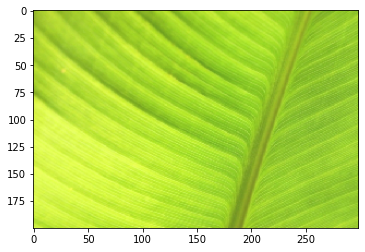

In [33]:
from keras.preprocessing import image

img = image.load_img("image/0001/foliage_final_005_new.jpg",target_size=(200,299))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

from keras.models import load_model
saved_model = load_model("model_final.h5")
output = saved_model.predict(img)
print(output)

## Plots for Accuracy and Loss

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


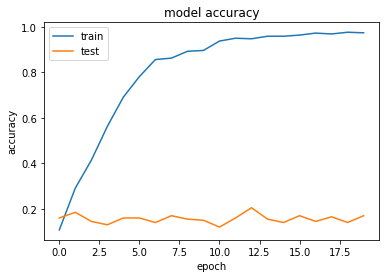

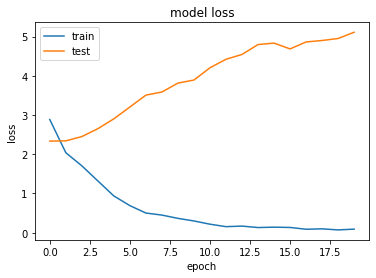

In [34]:
print(plot.history.keys())
# summarize history for accuracy
plt.plot(plot.history['acc'])
plt.plot(plot.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(plot.history['loss'])
plt.plot(plot.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Accuracy on Testing Data

In [35]:
from sklearn import metrics

# Measure accuracy
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_compare = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_compare, pred)
print("Final accuracy: {}".format(score))

Final accuracy: 0.17


In [36]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os
import requests
import base64


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to a single dummy variable.  The new columns (which do not replace the old) will have a 1
# at every location where the original column (name) matches each of the target_values.  One column is added for
# each target value.
def encode_text_single_dummy(df, name, target_values):
    for tv in target_values:
        l = list(df[name].astype(str))
        l = [1 if str(x) == str(tv) else 0 for x in l]
        name2 = "{}-{}".format(name, tv)
        df[name2] = l


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

## Confusion Matrix Plots

Confusion matrix, without normalization
[[ 1  3  2  1  0  0  2  2  4  1]
 [ 2  1  2  3  2  3  0  0  6  1]
 [ 0  0  2  2  1  1  1  2  3  0]
 [ 2  1  0  2  1  2  1  1  7  0]
 [ 4  1  2  1  2  1  3  1  6  1]
 [ 1  2  2  5  1  1  0  1  1  1]
 [ 0  0  1  2  3  3  1  1  6  0]
 [ 3  2  0  0  0  1  0  2  3  0]
 [ 1  2  3  7  2  1  4  4 20  4]
 [ 2  1  3  1  0  2  0  2  9  2]]
Normalized confusion matrix
[[0.06 0.19 0.12 0.06 0.   0.   0.12 0.12 0.25 0.06]
 [0.1  0.05 0.1  0.15 0.1  0.15 0.   0.   0.3  0.05]
 [0.   0.   0.17 0.17 0.08 0.08 0.08 0.17 0.25 0.  ]
 [0.12 0.06 0.   0.12 0.06 0.12 0.06 0.06 0.41 0.  ]
 [0.18 0.05 0.09 0.05 0.09 0.05 0.14 0.05 0.27 0.05]
 [0.07 0.13 0.13 0.33 0.07 0.07 0.   0.07 0.07 0.07]
 [0.   0.   0.06 0.12 0.18 0.18 0.06 0.06 0.35 0.  ]
 [0.27 0.18 0.   0.   0.   0.09 0.   0.18 0.27 0.  ]
 [0.02 0.04 0.06 0.15 0.04 0.02 0.08 0.08 0.42 0.08]
 [0.09 0.05 0.14 0.05 0.   0.09 0.   0.09 0.41 0.09]]


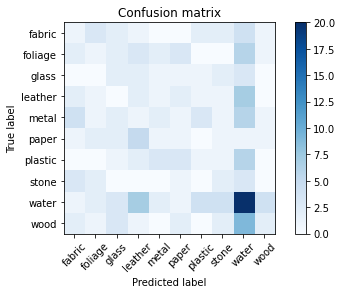

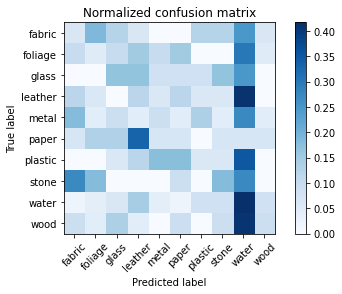

In [37]:
import numpy as np

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#model.load_weights('model.h5') # load weights from best model
df = pd.read_csv('data.csv',na_values=['NA','?'])
final = encode_text_index(df,"Target")
#pred = model.predict(X_train)
#pred = np.argmax(pred,axis=1)
#y_test2 = np.argmax(Y_train,axis=1)
    
# Compute confusion matrix
cm = confusion_matrix(y_compare, pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, final)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, final, title='Normalized confusion matrix')

plt.show()

## Accuracy on Training Data

In [38]:
from sklearn import metrics

# Measure accuracy
pred = model.predict(x_train)
pred = np.argmax(pred,axis=1)
y_compare = np.argmax(y_train,axis=1)
score = metrics.accuracy_score(y_compare, pred)
print("Final accuracy: {}".format(score))

Final accuracy: 1.0
